# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Question 1 code here
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
# Question 2 code here.

# Getting training and testing data from the data frame. Printing out the head.
train, test = train_test_split(df, test_size=0.5, random_state=0)

# Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** `LogisticRegression` uses $L2$ penalty by default.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** Without any penalty, the parameters would be as large as possible (perhaps infinite). Learning with a penalty would lead to smaller parameters.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** You do not need to. This is because `LogisticRegression.fit` automatically fits the intercept in its default parameters. Thus, a column of $1$s is not necessary

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

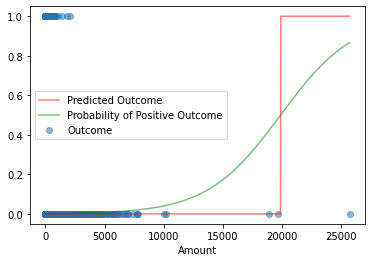

In [4]:
# Question 4 code here

# Retrieving training data; transposing the X training data since it's currently 1D.
x_train = train.Amount
X_train = np.c_[x_train]
y_train = train.Class

# Fitting the training data.
fraudlr = LogisticRegression(penalty='none', max_iter = 10000).fit(X_train,y_train)

# Retrieving test data and plotting it.
x_test = test.Amount
X_test = np.c_[x_test]
y_test = test.Class

fig, ax = plt.subplots()
ax.scatter(x_test, y_test, alpha=0.5, label="Outcome")

# Generating a range of values to test
x_max = np.max(x_test)
x_range = np.linspace(0, x_max, 1000)
X_range = np.c_[x_range]

# Getting y and probability predictions from the linear regression instance
y_hat = fraudlr.predict(X_range)
prob_pred = fraudlr.predict_proba(X_range)[:,1]

# Plotting predicted outcome and the probability of positive outcome
ax.plot(X_range, y_hat, color="r", alpha=0.5, label="Predicted Outcome")
ax.plot(X_range, prob_pred, color="g", alpha=0.5, label = "Probability of Positive Outcome")

# Generating legend and axis label, showing plot
ax.legend()
ax.set_xlabel("Amount")
plt.show()





## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** $fp + tp = 0+1=1$ instance is labeled positive.

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The furthest right instance, with an amount just over 25,000 is labelled positive. This is because it is above the decision threshold, which is somwhere around 20,000.

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** Not at all. It has a recall/sensitivity of 0, meaning none of the + in the data are correctly classified. In the context of this problem, this means none of the fraud has been properly identified.


In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
classes = [0,1]
y_hat = fraudlr.predict(X_test)
compute_performance(y_hat, y_test, [0,1])

## Put code here to compute whatever else you might need to answer the question.



tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** Smaller amounts. This is because the final beta parameter (which is the one for `Amount`) is negative, so all things held equal, the probability of a positive outcome (which means fraud) goes down as the amount increases.


In [6]:
# Code for Question 6
X_train_all = train.drop(columns=["Class"])
fraudlr_all = LogisticRegression(penalty='none', max_iter = 10000).fit(X_train_all,y_train)
print(f"betas: {fraudlr_all.coef_}")



betas: [[-5.05942679e-05  3.38384709e-01 -3.97657860e-01 -9.23554618e-01
   5.45338675e-01 -6.49872391e-04 -9.16611636e-02  6.01720109e-01
  -2.94413616e-01 -5.57877076e-01 -5.61092781e-01 -6.89218300e-01
   1.88361336e-01 -4.86610710e-01 -8.26833358e-01 -1.23159689e+00
  -4.56570221e-01 -2.93033332e-01  2.81618470e-01 -5.14357289e-02
   5.33194141e-01  7.65150718e-01  7.94359371e-01  1.39419629e-01
  -6.75868243e-02 -1.07380719e+00  2.91414647e-01 -2.13198459e-01
   1.29765247e-01 -5.43826596e-03]]


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** fp$+$tp$=145+34=179$ instances are labelled positive. 

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** This classifier is significantly better than the amount-only classifier. It has a recall of roughly 60%, meaning 60% of + in the data are correctly identified (as opposed to 0), and a precision of 81%, meaning there's an 81% chance of an item classified as + to actually be + (as opposed to 0).


In [7]:
# Code for Question 7

# Getting every variable minus the classification for X; retrieving y
X_test_all = test.drop(columns=["Class"])

# Predicting y and computing performance based on outcomes.
y_hat = fraudlr_all.predict(X_test_all)
compute_performance(y_hat, y_test, classes)


tp: 145 tn: 142127 fp: 34 fn: 98
Accuracy: 0.999 Recall: 0.597 Precision: 0.81 Sensitivity: 0.597 Specificity: 1.0


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The all-variable classifier has a much higher estimated probability of correctly distinguishing between a positive and negative instance. This is because its AUROC--which is a proxy for correctly distinguishing between positive and negative instances--is much further away from 0.5 than the Amount-only classifier.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** This happens if the classifier is somewhat capable of distinguishing between the two classes, but consistently misclassifies. For example, if all the classifications in the Amount-only classifier were swapped, its AUROC would be $0.50 + (0.50-0.4217) = .5783$, which would just mean that it does an equal job at differentiating between positives and negatives, but a better job at classifying which is which. Moreover, logistic regression only maximizes the likelihood of the outcome, without consideration for the AUROC. Thus, it's possible it chooses coefficients that lead to worse-than-random performance with respect to the AUROC.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AUROC:0.42178603619387894


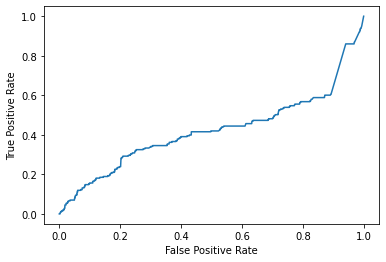

In [8]:
# ROC for Amount-only classifier
prob_pred = fraudlr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

# Retrieving ROC curve values and plotting.
sns.lineplot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print("AUROC:{}".format(auc(fpr,tpr)))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AUROC:0.9427221608097907


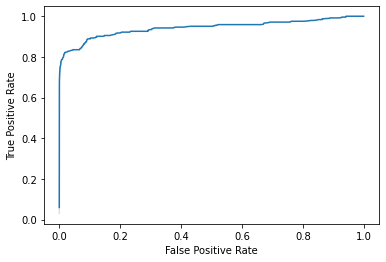

In [9]:
# ROC for all-variable classifier
X_test = np.c_[test.drop(columns=["Class"])]
prob_pred_all = fraudlr_all.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob_pred_all)

# Retrieving ROC curve values and plotting.
sns.lineplot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print("AUROC:{}".format(auc(fpr,tpr)))

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** In order to determine this, we need to see which classifier has a higher *precision* (y-axis value) at a *recall* (x-axis value) of 60%, or 0.6 In this case, it's the all-variable classifier by far.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


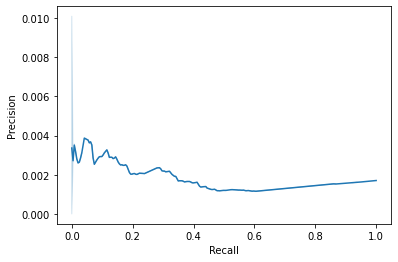

In [10]:
# PRC for Amount-only classifier

# Retrieving PRC values and plotting
precision, recall, thresholds = precision_recall_curve(y_test, prob_pred)
sns.lineplot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


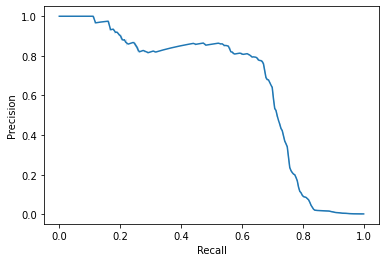

In [11]:
# PRC for all-variable classifier

# Retrieving PRC values and plotting
precision, recall, thresholds = precision_recall_curve(y_test, prob_pred_all)
sns.lineplot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()